<a href="https://colab.research.google.com/github/DAWNOCEANVIEW/Titanic-Machine-Learning-from-Disaster/blob/main/%EA%B5%90%EC%9E%AC_6%2C7%EC%9E%A5(%EC%8B%AC%ED%99%94%ED%95%99%EC%8A%B5)_%EB%B0%8F_pdf_2%2C3%EC%9E%A5(20%EC%AA%BD)_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**텐서플로에서 실행하는 다중 선형 회귀**



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 6ms/step - loss: 0.2564
Epoch 2502/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2564
Epoch 2503/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2563
Epoch 2504/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2563
Epoch 2505/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2562
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2562
Epoch 2507/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2562
Epoch 2508/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2561
Epoch 2509/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2561
Epoch 2510/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2560
Epoch 2511/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2560
Epoch 2512/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2

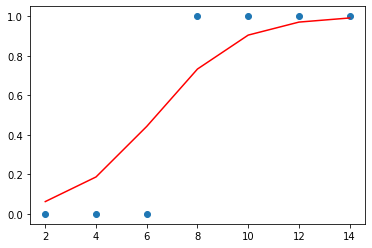

7시간 공부할 경우, 합격 예상 확률은 59.6%입니다.


array([[59.626995]], dtype=float32)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 공부시간 x, 합격여부 y로 두고 배열을 만든다.
x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation = 'sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy' 로 설정
model.compile(optimizer='sgd', loss = 'binary_crossentropy')
model.fit(x,y, epochs=5000)

# 그래프로 확인하는 작업
plt.scatter(x,y)
plt.plot(x , model.predict(x),'r')
plt.show()

# 임의의 학습 시간을 부여하여 합격 예상 확률을 예측해본다.
hour = 7
prediction = model.predict([hour])
print("%.f시간 공부할 경우, 합격 예상 확률은 %.01f%%입니다." %(hour,prediction * 100))
prediction * 100

**7장 심화학습(파이썬으로 만드는 신경망)**

**환경변수 설정하기**

In [59]:
# 입력 값 및 타깃 값
import random
import numpy as np
data = [
    [[0,0],[0]],
    [[0,1],[1]],
    [[1,0],[1]],
    [[1,1],[0]]
]

#실행 횟수(iterations), 학습률(Ir), 모멘텀 계수(mo) 설정
iterations = 5000
Ir = 0.1
mo = 0.9

In [60]:
# 활성화 함수 -1, 시그모이드
# 미분할 때와 아닐 때 각각의 값
def sigmoid(x, derivative=False):
  if(derivative==True):
    return x * (1-x)
  return 1 / (1 + np.exp(-x))

# 활성화 함수 - 2. tanh
# tanh 함수의 미분은 1 - (활성화 함수 출력의 제곱)
def tanh(x,derivative=False):
  if(derivative==True):
    return 1 - x ** 2
  return np.tanh(x)

# 가중치 배열을 만드는 함수
def makeMatrix(i,j,fill=0.0):
  mat = []
  for i in range(i):
    mat.append([fill]*j)
  return mat

**파이썬 코드로 실행하는 신경망**

In [61]:
# 신경망의 실행
class NeuralNetwork:

  # 초기값 지정
  def __init__(self, num_x, num_yh, num_yo,bias=1):

    # 입력 값(num_x), 은닉층의 초깃값(num_yh), 출력층의 초깃값(num_yo), 바이어스
    self.num_x = num_x + bias # 바이어스는 1로 설정
    self.num_yh = num_yh
    self.num_yo = num_yo

    # 활성화 함수 초깃값
    self.activation_input = [1, 0] * self.num_x
    self.activation_hidden = [1, 0] * self.num_yh
    self.activation_out = [1, 0] * self.num_yo


    # 가중치 입력 초깃값
    self.weight_in = makeMatrix(self.num_x, self.num_yh)
    for i in range(self.num_x):
      for j in range(self.num_yh):
        self.weight_in[i][j] = random.random()

    # 가중치 출력 초깃값
    self.weight_out = makeMatrix(self.num_yh, self.num_yo)
    for j in range(self.num_yh):
      for k in range(self.num_yo):
        self.weight_out[j][k] = random.random()

    # 모멘텀 SGD를 위한 이전 가중치 초깃값
    self.gradient_in = makeMatrix(self.num_x, self.num_yh)
    self.gradient_out = makeMatrix(self.num_yh, self.num_yo)



In [62]:
# 업데이트 함수
def update(self, inputs):

  # 입력층의 활성화 함수
  for i in range(self.num_x - 1):
    self.activation_input[i] = inputs[i]

  # 은닉층의 활성화 함수
  for j in range(self.num_yh):
    sum = 0.0
    for i in range(self.num_x):
      sum = sum + self.activation_input[i] * self.weight_in[i][j]
      
      # 시그모이드와 tanh 중에서 활성화 함수 선택
      self.activation_hidden[j] = tanh(sum, False)
    
    # 출력층의 활성화 함수
    for k in range(self.num_yo):
      sum = 0.0
      for j in range(self.num_yh):
        sum = sum + self.activation_hidden[j] * self.weight_out[j][k]

        # 시그모이드와 tanh 중에서 활성화 함수 선택
        self.activation_out[k] = tanh(sum, False) 
    
    return self.activation_out[:]

In [63]:
# 역전파 실행
def backPropagate(self, targets):

  # 델파 출력 계산
  output_deltas = [0, 0] * self.num_yo
  for k in range(self.num_yo):
    error = targets[k] - self.activation_out[k]
    #시그모이드와 tanh 중에서 활성화 함수 선택
    output_deltas[k] = tanh(self.activation_out[k], True) * error

  # 은닉 노드의 오차 함수
  hidden_deltas = [0,0] * self.num_yh
  for j in range(self.num_yh):
    error = 0.0
    for k in range(self.num_yh):
      error = error + output_deltas[k] * self.weight_out[j][k]
    
    # 시그모이드와 tanh 중에서 활성화 함수 선택, 미분 적용
    hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error
  
  # 출력 가중치 업데이트
  for j in range(self.num_yh):
    for k in range(self.num_yo):
      gradient = output_deltas[k] * self.activation_hidden[j]
      v = mo * self.gradient_out[j][k] - Ir * gradient
      self.weight_out[j][k] += v
      self.gradient_out[j][k] = gradient

  # 입력 가중치 업데이트
  for i in range(self.num_x):
    for j in range(self.num_yh):
      gradient = hidden_deltas[j] * self.activation_input[i]
      v = mo*self.gradient_in[i][j] - Ir * gradient
      self.weight_in[i][j] += v
      self.gradient_in[i][j] = gradient

  # 오차 계산(최소 제곱법)
  error = 0.0
  for k in range(len(targets)):
    error = error + 0.5 * (targets[k] - self.activation_out[k]) ** 2
  return error


In [67]:
# 학습 실행
def train(self, patterns):
  for i in range(iterations):
    error = 0.0
    for p in patterns:
      inputs = p[0]
      targets = p[1]
      self.update(inputs)
      error = error + self.backPropagate(targets)
    if i % 500 == 0:
      print('error: %-.5f' % error)


# 결과 값 출력
def result(self, patterns):
  for p in patterns:
    print('Input : %s, Predict: %s' % (p[0], self.update(p[0])))

if __name__ == '__main__':
  # 두 개의 입력 값, 두 개의 레이어, 하나의 출력 값을 갖도록 설정
  n = NeuralNetwork(2,2,1)

  # 학습 실행
  n.train(data)

  # 결괏값 출력
  n.result(data)

error: 0.51142
error: 0.00240
error: 0.00084
error: 0.00050
error: 0.00035
error: 0.00027
error: 0.00022
error: 0.00018
error: 0.00016
error: 0.00014
Input: [0, 0], Predict: [0.000595360142619254]
Input: [0, 1], Predict: [0.9889953052089223]
Input: [1, 0], Predict: [0.9890254046278436]
Input: [1, 1], Predict: [0.0021557837513592874]


In [68]:
import pandas as pd
df = pd.read_csv(
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
df.columns = ["sepal length", "sepal width", "petal length", "petal width","class"]

df


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
# 코드의 실행에 필요한 모듈을 읽습니다
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Iris 라는 데이터 세트를 읽습니다
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2,
random_state = 0)

#훈련데이터와 테스트 데이터의 사이즈를 확인합니다
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("X_test:", y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
X_test: (30,)


In [70]:
# 코드의 실행에 필요한 묘듈을 로드합니다
from sklearn import svm, datasets, model_selection

# "iris"라는 데이터 세트를 가져옵니다
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X, "/n", y, "/n")
#머신러닝 알고리즘 SVM을 사용합니다
svc = svm.SVC(C=1, kernel="rbf",gamma=0.001)

#교차 검증법을 이용하여 점수를 요구합니다
#내부에서는 분할 처리됨 각각
scores = model_selection.cross_val_score(svc, X,y,cv=5)

print(scores)
print("평균 점수:", scores.mean())

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [71]:
import pandas as pd
df = pd.read_csv(
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

df.iloc[0:100].values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [72]:
import numpy as np

y = df.iloc[0:100,4].values # 인덱스 4 값만 출력
print(y)

y = np.where(y =="iris-setosa",-1,1) # y가 lris와 같으면 -1 아니면 1
print(y)

X = df.iloc[0:100,[0,2]].values #0~99까지 [0,2]인덱스 값만 출력
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

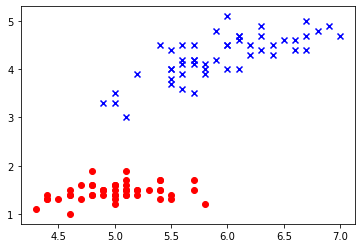

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#불꽃종류 2개
y = df.iloc[0:100, 4].values
y = np.where(y == 'lris-setosa',-1,1)

# 꽃잎과 꽃받침의 길이
X = df.iloc[0:100, [0,2]].values

#플릿 데이터
plt.scatter(X[:50,0], X[:50, 1],
           color='red', marker ='o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100, 1],
           color='blue', marker ='x', label = 'versicolor')

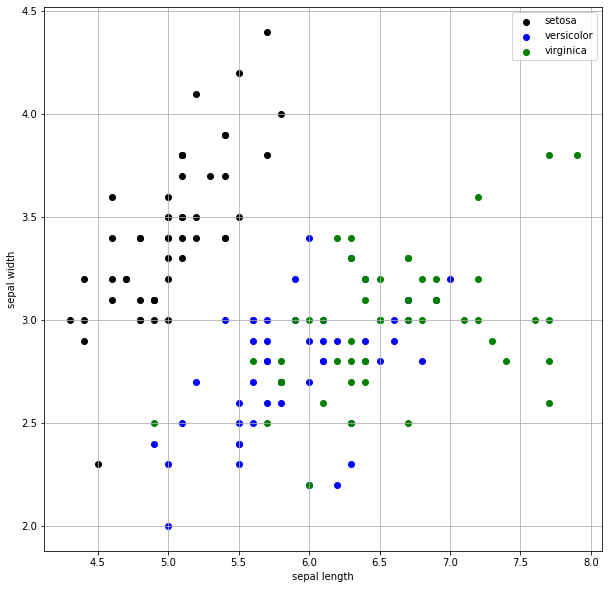

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# iris 데이터를 가져옵니다
df_iris = pd.read_csv(
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
df.columns = ["sepal length", "sepal width", "petal length", "petal width","class"]
fig = plt.figure(figsize=(10,10))

plt.scatter(df_iris.iloc[:50,0], df_iris.iloc[:50,1],label="setosa", color = "k")
plt.scatter(df_iris.iloc[50:100,0], df_iris.iloc[50:100,1],label="versicolor", color = "b")
plt.scatter(df_iris.iloc[100:150,0], df_iris.iloc[100:150,1],label="virginica", color = "g")

plt.xlabel("sepal length")
plt.ylabel("sepal width")

#그림 표시
plt.legend(loc = "best")
plt.grid(True)
plt.show()

3장

In [76]:
import numpy
from sklearn.metrics import confusion_matrix

# 데이터 저장 양성 0 음성 1
y_true = [0,0,0,1,1,1]
y_pred = [1,0,0,1,1,1]

#변수 contmat에 위의 데이터들의 혼동 행렬을 정렬하세요
confmat = confusion_matrix(y_true, y_pred)

print(confmat)

[[2 1]
 [0 3]]


In [79]:
# 성능 평가지수
import numpy
from sklearn.metrics import confusion_matrix

# 적합률, 재현율, F
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

#데이터 저장 양성 0 음성 1
y_true = [0,0,0,1,1,1]
y_pred = [1,0,0,1,1,1]

#변수 contmat에 위의 데이터들의 혼동 행렬을 정렬하세요
confmat = confusion_matrix(y_true, y_pred)

print(confmat,"\n")

#y_true 정답라벨 y_pred 예측 결과 라벨
print("Precision: %.3f" % precision_score(y_true, y_pred))
print("Recall: %.3f" % recall_score(y_true,y_pred))
print("F1: %.3f" % f1_score(y_true, y_pred))

[[2 1]
 [0 3]] 

Precision: 0.750
Recall: 1.000
F1: 0.857
